In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
yelp= pd.read_csv('yelp.csv')

In [3]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.shape

(10000, 10)

In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
yelp['length'] = yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


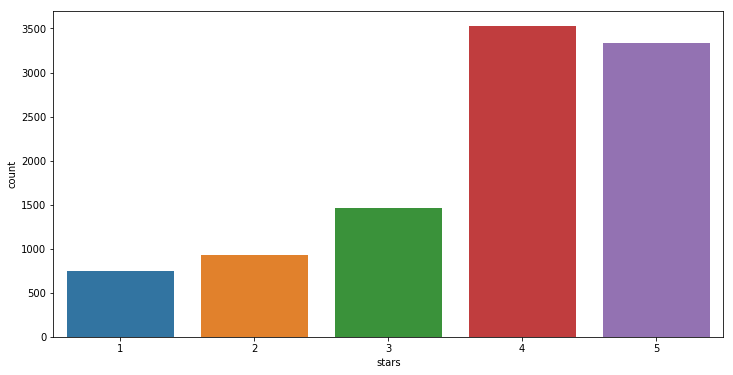

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='stars',data=yelp)

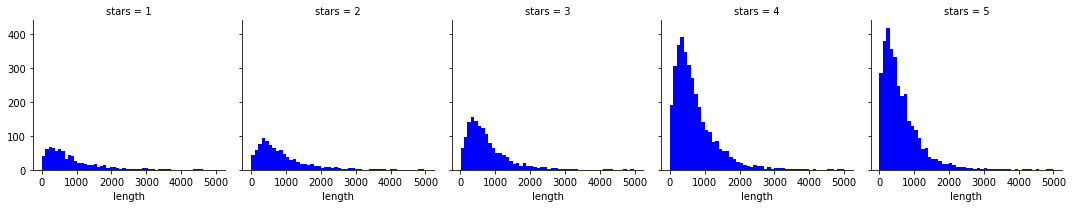

In [9]:
graph = sns.FacetGrid(data=yelp,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

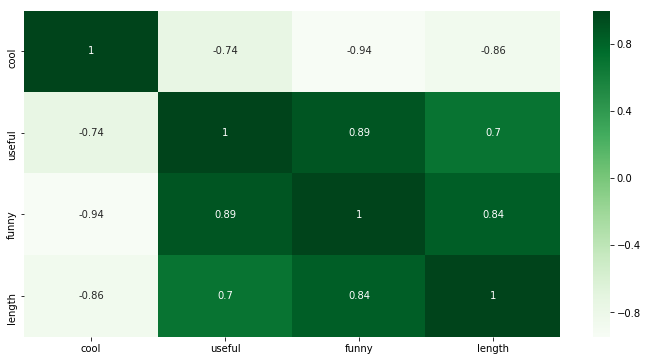

In [10]:
plt.figure(figsize=(12,6))
yelpstar=yelp.groupby('stars').mean()
yelpstar.corr()
sns.heatmap(data=yelpstar.corr(),annot = True,cmap="Greens")

In [11]:
yelpstar=yelp.groupby('stars').mean()
yelpstar

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [13]:
#Separating thee dataset intoo X and y

yelp_class= yelp[(yelp['stars'] == 1) | (yelp['stars'] == 3) | (yelp['stars'] == 5)]
x=yelp_class['text']
y=yelp_class['stars']
print(x.head())
print(y.head())
print(yelp_class.shape)

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64
(5547, 11)


In [14]:
#Data cleaning removal the stopwords and punctuation
import string
def text_1(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [15]:
#We will now vectorize our results
from sklearn.feature_extraction.text import CountVectorizer
yelpvocab = CountVectorizer(analyzer=text_1).fit(x)
print(len(yelpvocab.vocabulary_))

31336


In [16]:
print(x)

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
6       Drop what you're doing and drive here. After I...
9       Nobuo shows his unique talents with everything...
10      The oldish man who owns the store is as sweet ...
11      Wonderful Vietnamese sandwich shoppe. Their ba...
12      They have a limited time thing going on right ...
16      We went here on a Saturday afternoon and this ...
17      okay this is the best place EVER! i grew up sh...
18      I met a friend for lunch yesterday. \n\nLoved ...
20      DVAP....\n\nYou have to go at least once in yo...
21      This place shouldn't even be reviewed - becaus...
22      first time my friend and I went there... it wa...
23      U can go there n check the car out. If u wanna...
24      I love this place! I have been coming here for...
26      I love

In [17]:
r10=x[0]
print(r10)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [18]:
vocab0=yelpvocab.transform([r10])
print(vocab0)
print(vocab0.shape)

  (0, 292)	1
  (0, 1213)	1
  (0, 1811)	1
  (0, 3537)	1
  (0, 5139)	1
  (0, 5256)	2
  (0, 6275)	1
  (0, 8521)	1
  (0, 10646)	1
  (0, 10647)	1
  (0, 11128)	2
  (0, 11479)	1
  (0, 11779)	1
  (0, 12206)	2
  (0, 12221)	1
  (0, 12297)	1
  (0, 12386)	1
  (0, 12675)	1
  (0, 12689)	1
  (0, 13135)	1
  (0, 13186)	1
  (0, 14247)	1
  (0, 15385)	1
  (0, 16292)	1
  (0, 16412)	1
  :	:
  (0, 23318)	1
  (0, 23801)	1
  (0, 23902)	1
  (0, 23976)	1
  (0, 24080)	1
  (0, 24177)	1
  (0, 24544)	2
  (0, 24972)	2
  (0, 26383)	1
  (0, 26543)	1
  (0, 26978)	1
  (0, 27029)	1
  (0, 27068)	1
  (0, 28403)	1
  (0, 28735)	1
  (0, 29230)	1
  (0, 29313)	1
  (0, 29620)	1
  (0, 30135)	1
  (0, 30240)	1
  (0, 30471)	1
  (0, 30488)	1
  (0, 30672)	1
  (0, 30854)	1
  (0, 30900)	1
(1, 31336)


In [19]:
print('Following Words Back:')
print(yelpvocab.get_feature_names()[26383])
print(yelpvocab.get_feature_names()[30900])

Following Words Back:
scrambled
wife


In [20]:
x=yelpvocab.transform(x)

In [21]:
#print shape of the sparse matrix
print('Shape of the sparse matrix: ', x.shape)

#Non Zero occurences
print("Non-zero occurences: ",x.nnz)

#Density of the matrix
density=(x.nnz/(x.shape[0]*x.shape[1])) * 100
print("Density of the matrix =",density)

Shape of the sparse matrix:  (5547, 31336)
Non-zero occurences:  312457
Density of the matrix = 0.17975812697942373


In [22]:
#Splitting the dataset into training data and test data in the proportion of 80:20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [23]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 75  49  38]
 [  7 180 105]
 [ 12  45 599]]
Score: 76.94
Classification Report:               precision    recall  f1-score   support

           1       0.80      0.46      0.59       162
           3       0.66      0.62      0.64       292
           5       0.81      0.91      0.86       656

   micro avg       0.77      0.77      0.77      1110
   macro avg       0.75      0.66      0.69      1110
weighted avg       0.77      0.77      0.76      1110



In [24]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 93  36  33]
 [ 23 188  81]
 [ 12  60 584]]
Score: 77.93
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.57      0.64       162
           3       0.66      0.64      0.65       292
           5       0.84      0.89      0.86       656

   micro avg       0.78      0.78      0.78      1110
   macro avg       0.74      0.70      0.72      1110
weighted avg       0.77      0.78      0.78      1110



In [25]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(yelp_class['text'],yelp_class['stars'],test_size=0.2,random_state=101)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_1)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier())  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [27]:
pipeline.fit(x_train1,y_train1)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_1 at 0x000001C46020D730>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])

In [28]:
predictions = pipeline.predict(x_test1)

In [29]:
print("Confusion Matrix for Multinomial Bayes Pipeline :")
print(confusion_matrix(y_test1,predictions))
print("Score: ",round(accuracy_score(y_test1,predictions)*100,2))
print("Classification Report:")
print(classification_report(y_test1,predictions))

Confusion Matrix for Multinomial Bayes Pipeline :
[[ 96  31  35]
 [ 15 179  98]
 [  7  50 599]]
Score:  78.74
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.59      0.69       162
           3       0.69      0.61      0.65       292
           5       0.82      0.91      0.86       656

   micro avg       0.79      0.79      0.79      1110
   macro avg       0.77      0.71      0.73      1110
weighted avg       0.78      0.79      0.78      1110



In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_1)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB())  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [32]:
pipeline.fit(x_train1,y_train1)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_1 at 0x000001C46020D730>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [33]:
predictions = pipeline.predict(x_test1)

In [34]:
print("Confusion Matrix for Multinomial Bayes Pipeline :")
print(confusion_matrix(y_test1,predictions))
print("Score: ",round(accuracy_score(y_test1,predictions)*100,2))
print("Classification Report:")
print(classification_report(y_test1,predictions))

Confusion Matrix for Multinomial Bayes Pipeline :
[[  0   0 162]
 [  0   0 292]
 [  0   0 656]]
Score:  59.1
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       292
           5       0.59      1.00      0.74       656

   micro avg       0.59      0.59      0.59      1110
   macro avg       0.20      0.33      0.25      1110
weighted avg       0.35      0.59      0.44      1110



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
